Perhatikan Data "data_retail.csv" hanya :
1. no
2. Row_Num
3. Customer_ID
4. Product
5. First_Transaction
6. Last_Transaction
7. Average_Transaction_Amount
8. Count_Transaction

# Importing Data & Inspection
Importlah dataset dari https://storage.googleapis.com/dqlab-dataset/data_retail.csv dan kemudian inspeksilah dataset tersebut dengan

mencetak lima data teratas saja,
mencetak info dataset.
Berikut datasetnya yang dibukakan dengan menggunakan Text Editor:

---data masih berantakan kita harus merapikan terdahulu---

In [152]:
import pandas as pd

df = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/data_retail.csv', sep=';')

print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

Lima data teratas:
   no  Row_Num  Customer_ID Product  First_Transaction  Last_Transaction  \
0   1        1        29531   Jaket      1466304274396     1538718482608   
1   2        2        29531  Sepatu      1406077331494     1545735761270   
2   3        3       141526     Tas      1493349147000     1548322802000   
3   4        4       141526   Jaket      1493362372547     1547643603911   
4   5        5        37545  Sepatu      1429178498531     1542891221530   

   Average_Transaction_Amount  Count_Transaction  
0                     1467681                 22  
1                     1269337                 41  
2                      310915                 30  
3                      722632                 27  
4                     1775036                 25  

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      ----

# Data Cleansing
Dua kolom yang menunjukkan terjadinya transaksi tidak bertipe datetime, maka ubahlah kedua kolom tersebut ke tipe data datetime. Kemudian cetaklah kembali 5 data teratas dari dataframe df dan juga tipe data masing-masing kolomnya.

---perhatikan di First Transaction & Last Transaction, disana merubah type data biar bisa terbaca date time, yang pertamanya int64 berubah ke datetime64[ns] ---

In [154]:
import pandas as pd

df = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/data_retail.csv', sep=';')
######################################### pisah kan #######################################################

# Kolom First_Transaction
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
# Kolom Last_Transaction
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')

print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

Lima data teratas:
   no  Row_Num  Customer_ID Product             First_Transaction  \
0   1        1        29531   Jaket 2016-06-19 02:44:34.396000000   
1   2        2        29531  Sepatu 2014-07-23 01:02:11.493999872   
2   3        3       141526     Tas 2017-04-28 03:12:27.000000000   
3   4        4       141526   Jaket 2017-04-28 06:52:52.546999808   
4   5        5        37545  Sepatu 2015-04-16 10:01:38.530999808   

               Last_Transaction  Average_Transaction_Amount  Count_Transaction  
0 2018-10-05 05:48:02.608000000                     1467681                 22  
1 2018-12-25 11:02:41.269999872                     1269337                 41  
2 2019-01-24 09:40:02.000000000                      310915                 30  
3 2019-01-16 13:00:03.911000064                      722632                 27  
4 2018-11-22 12:53:41.529999872                     1775036                 25  

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries,

In [156]:
### cek data yang telah dirubah
df.loc[10:]

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
10,11,11,25436,Sepatu,2014-02-10 04:19:29.556999936,2017-07-10 13:06:00.290999808,1037207,21
11,12,12,35111,Sepatu,2014-12-02 03:12:43.624000000,2018-03-07 06:17:54.549999872,669514,27
12,13,13,119476,Jaket,2017-03-28 03:26:37.844000000,2018-12-19 13:22:27.591000064,1704460,23
13,14,14,119476,Sepatu,2017-06-09 02:46:17.030999808,2018-12-30 03:48:42.264000000,1567814,30
14,15,15,146582,Jaket,2017-05-16 05:21:01.178999808,2018-07-17 04:49:05.665999872,298824,22
...,...,...,...,...,...,...,...,...
99995,99996,99996,56249,Jaket,2016-06-01 11:35:39.092000000,2016-06-01 11:35:39.092000000,298662,1
99996,99997,99997,56249,Sepatu,2017-02-09 05:46:10.763000064,2017-02-09 05:46:10.763000064,349556,1
99997,99998,99998,34157,Jaket,2015-08-30 08:54:20.706000128,2015-08-30 08:54:20.706000128,598013,1
99998,99999,99999,34157,Sepatu,2014-11-14 02:42:28.026000128,2014-11-14 02:42:28.026000128,1208591,1


# Churn Customers
Untuk menentukan churn customers sesuai definisi yang telah diberikan, carilah

transaksi paling terakhir kapan dilakukan
klasifikasikanlah mana customer yang berstatus churn dan mana yang tidak.
Setelah itu cetak lima data teratas dan informasi dataset.

---disini akan menambah kolom baru yaitu "is_churn" dan fungsinya is_churn adalah memisahkan data / kategorikan data yang True ( dibawah tahun 2018/08/01 ) sedangkan False ( diatas tahun 2018/08/01 )---

In [157]:
# Pengecekan transaksaksi terakhir dalam dataset
print(max(df['Last_Transaction']))

# Klasifikasikan customer yang berstatus churn atau tidak
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True
df.loc[df['Last_Transaction'] > '2018-08-01', 'is_churn'] = False

print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

2019-02-01 23:57:57.286000128
Lima data teratas:
   no  Row_Num  Customer_ID Product             First_Transaction  \
0   1        1        29531   Jaket 2016-06-19 02:44:34.396000000   
1   2        2        29531  Sepatu 2014-07-23 01:02:11.493999872   
2   3        3       141526     Tas 2017-04-28 03:12:27.000000000   
3   4        4       141526   Jaket 2017-04-28 06:52:52.546999808   
4   5        5        37545  Sepatu 2015-04-16 10:01:38.530999808   

               Last_Transaction  Average_Transaction_Amount  \
0 2018-10-05 05:48:02.608000000                     1467681   
1 2018-12-25 11:02:41.269999872                     1269337   
2 2019-01-24 09:40:02.000000000                      310915   
3 2019-01-16 13:00:03.911000064                      722632   
4 2018-11-22 12:53:41.529999872                     1775036   

   Count_Transaction is_churn  
0                 22    False  
1                 41    False  
2                 30    False  
3                 27    False

In [158]:
df.loc[10:]

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn
10,11,11,25436,Sepatu,2014-02-10 04:19:29.556999936,2017-07-10 13:06:00.290999808,1037207,21,True
11,12,12,35111,Sepatu,2014-12-02 03:12:43.624000000,2018-03-07 06:17:54.549999872,669514,27,True
12,13,13,119476,Jaket,2017-03-28 03:26:37.844000000,2018-12-19 13:22:27.591000064,1704460,23,False
13,14,14,119476,Sepatu,2017-06-09 02:46:17.030999808,2018-12-30 03:48:42.264000000,1567814,30,False
14,15,15,146582,Jaket,2017-05-16 05:21:01.178999808,2018-07-17 04:49:05.665999872,298824,22,True
...,...,...,...,...,...,...,...,...,...
99995,99996,99996,56249,Jaket,2016-06-01 11:35:39.092000000,2016-06-01 11:35:39.092000000,298662,1,True
99996,99997,99997,56249,Sepatu,2017-02-09 05:46:10.763000064,2017-02-09 05:46:10.763000064,349556,1,True
99997,99998,99998,34157,Jaket,2015-08-30 08:54:20.706000128,2015-08-30 08:54:20.706000128,598013,1,True
99998,99999,99999,34157,Sepatu,2014-11-14 02:42:28.026000128,2014-11-14 02:42:28.026000128,1208591,1,True


# Menghapus kolom yang tidak diperlukan
Sesuai dengan pada jawaban pada quiz sebelumnya, hapuslah kolom-kolom yang dimaksud dengan melengkapi code pada live code editor.

---perhatikan di del kita akan menghapus kolom "no" dan "Row_Num"


In [159]:
del df['no']
del df['Row_Num']

# Cetak lima data teratas
print(df.head())

   Customer_ID Product             First_Transaction  \
0        29531   Jaket 2016-06-19 02:44:34.396000000   
1        29531  Sepatu 2014-07-23 01:02:11.493999872   
2       141526     Tas 2017-04-28 03:12:27.000000000   
3       141526   Jaket 2017-04-28 06:52:52.546999808   
4        37545  Sepatu 2015-04-16 10:01:38.530999808   

               Last_Transaction  Average_Transaction_Amount  \
0 2018-10-05 05:48:02.608000000                     1467681   
1 2018-12-25 11:02:41.269999872                     1269337   
2 2019-01-24 09:40:02.000000000                      310915   
3 2019-01-16 13:00:03.911000064                      722632   
4 2018-11-22 12:53:41.529999872                     1775036   

   Count_Transaction is_churn  
0                 22    False  
1                 41    False  
2                 30    False  
3                 27    False  
4                 25    False  


In [160]:
###df.loc[10:]
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Customer_ID                 100000 non-null  int64         
 1   Product                     100000 non-null  object        
 2   First_Transaction           100000 non-null  datetime64[ns]
 3   Last_Transaction            100000 non-null  datetime64[ns]
 4   Average_Transaction_Amount  100000 non-null  int64         
 5   Count_Transaction           100000 non-null  int64         
 6   is_churn                    100000 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 5.3+ MB
None


# Customer Acquisition By Year
Setelah semuanya lancar, langkah berikutnya adalah membuat visualisasi data berupa trend of customer acquisition by year dengan meggunakan bar chart. Untuk itu buatlah feature/kolom tambahan yang merupakan tahun dari First_Transaction dan tahun dari Last_Transaction masing-masingnya dengan nama Year_First_Transaction dan Year_Last_Transaction sebelum melakukan visualisasi.

---kita akan membuat visualisasi data dengan contoh grafik bar, data yang kita ambil adalah, sebelum kita ambil kita extract data / kategorikan data dari First_Transaction ke Year_First_Transaction ( ambil data tahun ) & Last_Transaction ke Year_Last_Transaction ( ambil data tahun ), baru setelah itu di visualisasi dari data Year_First_Transaction ( yaitu X ) & Customer_ID ( yaitu Y ) - diingat untuk buat grafik data harus di satukan atau groupby

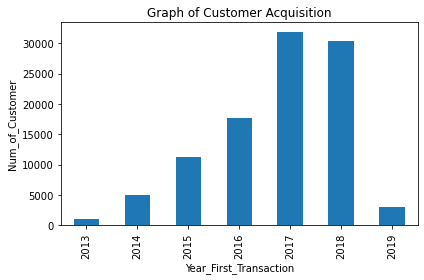

In [161]:
import matplotlib.pyplot as plt

# Kolom tahun transaksi pertama
df['Year_First_Transaction'] = df['First_Transaction'].dt.year

# Kolom tahun transaksi terakhir
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year
df_year = df.groupby(['Year_First_Transaction'])['Customer_ID'].count()
df_year.plot(x='Year_First_Transaction', y='Customer_ID', kind='bar', title='Graph of Customer Acquisition')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

In [162]:
df.loc[10:]

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn,Year_First_Transaction,Year_Last_Transaction
10,25436,Sepatu,2014-02-10 04:19:29.556999936,2017-07-10 13:06:00.290999808,1037207,21,True,2014,2017
11,35111,Sepatu,2014-12-02 03:12:43.624000000,2018-03-07 06:17:54.549999872,669514,27,True,2014,2018
12,119476,Jaket,2017-03-28 03:26:37.844000000,2018-12-19 13:22:27.591000064,1704460,23,False,2017,2018
13,119476,Sepatu,2017-06-09 02:46:17.030999808,2018-12-30 03:48:42.264000000,1567814,30,False,2017,2018
14,146582,Jaket,2017-05-16 05:21:01.178999808,2018-07-17 04:49:05.665999872,298824,22,True,2017,2018
...,...,...,...,...,...,...,...,...,...
99995,56249,Jaket,2016-06-01 11:35:39.092000000,2016-06-01 11:35:39.092000000,298662,1,True,2016,2016
99996,56249,Sepatu,2017-02-09 05:46:10.763000064,2017-02-09 05:46:10.763000064,349556,1,True,2017,2017
99997,34157,Jaket,2015-08-30 08:54:20.706000128,2015-08-30 08:54:20.706000128,598013,1,True,2015,2015
99998,34157,Sepatu,2014-11-14 02:42:28.026000128,2014-11-14 02:42:28.026000128,1208591,1,True,2014,2014


# Transaction by year
Visualisasikanlah trend jumlah transaksi per tahunnya dengan menggunakan bar chart.
--- disini data yang diambil adalah X = Year First Transaction & Y = Count Transaction ---
--- data harus disatukan atau di groupby ---

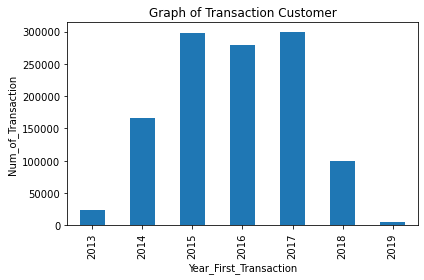

In [163]:
import matplotlib.pyplot as plt
plt.clf()
df_year = df.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
df_year.plot(x='Year_First_Transaction', y='Count_Transaction', kind='bar', title='Graph of Transaction Customer')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Transaction')
plt.tight_layout()
plt.show()

# Average transaction amount by year
Dengan menggunakan seaborn pointplot, visualisasikanlah tren dari tahun ke tahun rata-rata jumlah transaksi untuk tiap-tiap produknya.

--- data digroupby yaitu data "Product & Year First Transaction dan dicari nilai tengahnya---
--- data X = Year First Transaction & Y = Average Transaction Amount

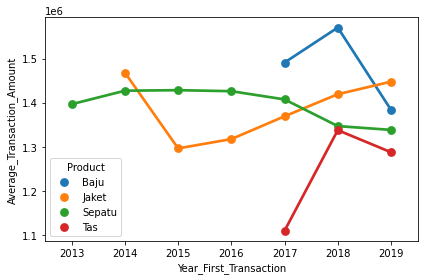

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.clf()
sns.pointplot(data = df.groupby(['Product', 'Year_First_Transaction']).mean().reset_index(),
			  x='Year_First_Transaction',
			  y='Average_Transaction_Amount',
			  hue='Product')
plt.tight_layout()
plt.show()

# Proporsi churned customer untuk setiap produk
Dari sisi churned customer, khususnya untuk melihat seberapa besar proporsi churned customer untuk tiap-tiap produk dapat diketahui insight-nya melalui pie chart. Visualisasikan pie chartnya untuk keempat produk yang dimaksudkan.
-- data dipisah di pivot table dan sesuaikan data yang ingin ditampilkan ---

<Figure size 432x288 with 0 Axes>

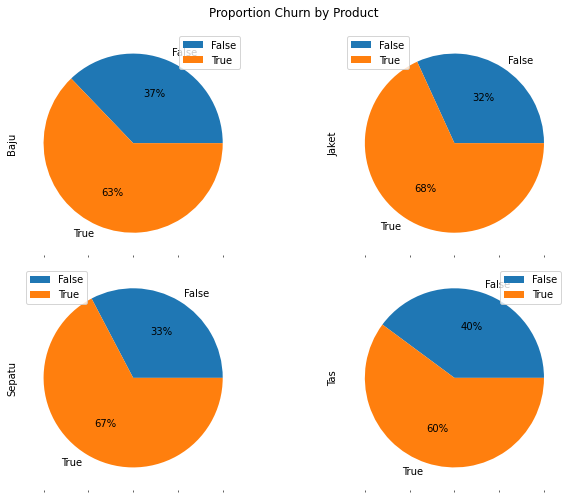

In [165]:
import matplotlib.pyplot as plt
plt.clf()

# Melakukan pivot data
df_piv = df.pivot_table(index='is_churn',
						columns='Product',
						values='Customer_ID',
						aggfunc='count',
						fill_value=0)

# Mendapatkan Proportion Churn by Product
plot_product = df_piv.count().sort_values(ascending=False).head(5).index

# Plot pie chartnya
df_piv = df_piv.reindex(columns=plot_product)
df_piv.plot.pie(subplots=True,
				figsize=(10, 7),
				layout=(-1, 2),
				autopct='%1.0f%%',
				title='Proportion Churn by Product')
plt.tight_layout()
plt.show()

In [166]:
df.loc[10:]
###disini perhatikan untuk "count transaction group belum ada"

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn,Year_First_Transaction,Year_Last_Transaction
10,25436,Sepatu,2014-02-10 04:19:29.556999936,2017-07-10 13:06:00.290999808,1037207,21,True,2014,2017
11,35111,Sepatu,2014-12-02 03:12:43.624000000,2018-03-07 06:17:54.549999872,669514,27,True,2014,2018
12,119476,Jaket,2017-03-28 03:26:37.844000000,2018-12-19 13:22:27.591000064,1704460,23,False,2017,2018
13,119476,Sepatu,2017-06-09 02:46:17.030999808,2018-12-30 03:48:42.264000000,1567814,30,False,2017,2018
14,146582,Jaket,2017-05-16 05:21:01.178999808,2018-07-17 04:49:05.665999872,298824,22,True,2017,2018
...,...,...,...,...,...,...,...,...,...
99995,56249,Jaket,2016-06-01 11:35:39.092000000,2016-06-01 11:35:39.092000000,298662,1,True,2016,2016
99996,56249,Sepatu,2017-02-09 05:46:10.763000064,2017-02-09 05:46:10.763000064,349556,1,True,2017,2017
99997,34157,Jaket,2015-08-30 08:54:20.706000128,2015-08-30 08:54:20.706000128,598013,1,True,2015,2015
99998,34157,Sepatu,2014-11-14 02:42:28.026000128,2014-11-14 02:42:28.026000128,1208591,1,True,2014,2014


# Distribusi Kategori Count Transaction
Selanjutnya akan melakukan visualisasi dari distribusi kategorisasi count transaction. Kategorisasi ini dilakukan dengan mengelompokkan jumlah transaksi seperti yang diperlihatkan oleh tabel berikut:

Rentang jumlah transaksi === Kategori
s/d 1 === 1. 1
2 s/d 3	=== 2. 2 - 3
4 s/d 6	=== 3. 4 - 6
7 s/d 10 === 4. 7 - 10
> 10 === 5. > 10
 

Setelah menambahkan kolom baru untuk kategori ini dengan nama Count_Transaction_Group, maka visualisasikanlah dengan bar chart. 

Seperti berikut ini bar chart yang dikehendaki:

---disini akan mengkategorikan data Count Transaction ke Count Transaction Group perhatikan di "func" disitu dia menyesuaikan Count_Transaction ke Count_Transaction_Group ---
--- dan data yang dipakai X = Count Transaction Group & Y = Customer ID

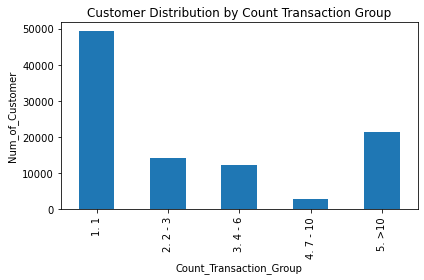

In [167]:
import matplotlib.pyplot as plt
plt.clf()
# Kategorisasi jumlah transaksi
def func(row):
	if row['Count_Transaction'] == 1:
		val = '1. 1'
	elif (row['Count_Transaction'] >1 and row['Count_Transaction'] <= 3):
		val ='2. 2 - 3'
	elif (row['Count_Transaction'] >3 and row['Count_Transaction'] <= 6):
		val ='3. 4 - 6'
	elif (row['Count_Transaction'] >6 and row['Count_Transaction'] <= 10):
		val ='4. 7 - 10'
	else:
		val ='5. >10'
	return val
# Tambahkan kolom baru
df['Count_Transaction_Group'] = df.apply(func, axis=1)
df_year = df.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
df_year.plot(x='Count_Transaction_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Count Transaction Group')
plt.xlabel('Count_Transaction_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

In [168]:
df.loc[10:]
### data Count_Transaction_Group sudah muncul dan mengkategorikan data dari Count_Transaction

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn,Year_First_Transaction,Year_Last_Transaction,Count_Transaction_Group
10,25436,Sepatu,2014-02-10 04:19:29.556999936,2017-07-10 13:06:00.290999808,1037207,21,True,2014,2017,5. >10
11,35111,Sepatu,2014-12-02 03:12:43.624000000,2018-03-07 06:17:54.549999872,669514,27,True,2014,2018,5. >10
12,119476,Jaket,2017-03-28 03:26:37.844000000,2018-12-19 13:22:27.591000064,1704460,23,False,2017,2018,5. >10
13,119476,Sepatu,2017-06-09 02:46:17.030999808,2018-12-30 03:48:42.264000000,1567814,30,False,2017,2018,5. >10
14,146582,Jaket,2017-05-16 05:21:01.178999808,2018-07-17 04:49:05.665999872,298824,22,True,2017,2018,5. >10
...,...,...,...,...,...,...,...,...,...,...
99995,56249,Jaket,2016-06-01 11:35:39.092000000,2016-06-01 11:35:39.092000000,298662,1,True,2016,2016,1. 1
99996,56249,Sepatu,2017-02-09 05:46:10.763000064,2017-02-09 05:46:10.763000064,349556,1,True,2017,2017,1. 1
99997,34157,Jaket,2015-08-30 08:54:20.706000128,2015-08-30 08:54:20.706000128,598013,1,True,2015,2015,1. 1
99998,34157,Sepatu,2014-11-14 02:42:28.026000128,2014-11-14 02:42:28.026000128,1208591,1,True,2014,2014,1. 1


# Distribusi kategorisasi average transaction amount
Selanjutnya, akan melakukan visualisasi dari distribusi kategorisasi average transaction amount. Kategorisasi ini dilakukan dengan mengelompokkan rata-rata besar transaksi seperti yang diperlihatkan oleh tabel berikut:

Rentang rata-rata besar transaksi === Kategori
100.000 s/d 250.000	=== 1. 100.000 - 250.000
>250.000 s/d 500.000	=== 2. >250.000 - 500.000
>500.000 s/d 750.000	=== 3. >500.000 - 750.000
>750.000 s/d 1.000.000	=== 4. >750.000 - 1.000.000
>1.000.000 s/d 2.500.000 ===	5. >1.000.000 - 2.500.000
>2.500.000 s/d 5.000.000	=== 6. >2.500.000 - 5.000.000
>5.000.000 s/d 10.000.000	=== 7. >5.000.000 - 10.000.000
>10.000.000	=== 8. >10.000.000
 

Setelah ditambahkan kolom baru untuk kategori ini dengan nama Average_Transaction_Amount_Group, maka visualisasikanlah dengan bar chart. 

Seperti berikut ini bar chart yang dikehendaki:

---perhatikan di "f" disitu dia buat kategori data dari Average_Transaction_Amount ke Average_Transaction_Amount_Group

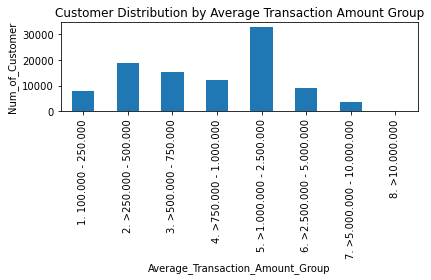

In [169]:
import matplotlib.pyplot as plt
plt.clf()
# Kategorisasi rata-rata besar transaksi
def f(row):
	if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <=250000):
		val ='1. 100.000 - 250.000'
	elif (row['Average_Transaction_Amount'] >250000 and row['Average_Transaction_Amount'] <= 500000):
		val ='2. >250.000 - 500.000'
	elif (row['Average_Transaction_Amount'] >500000 and row['Average_Transaction_Amount'] <= 750000):
		val ='3. >500.000 - 750.000'
	elif (row['Average_Transaction_Amount'] >750000 and row['Average_Transaction_Amount'] <= 1000000):
		val ='4. >750.000 - 1.000.000'
	elif (row['Average_Transaction_Amount'] >1000000 and row['Average_Transaction_Amount'] <= 2500000):
		val ='5. >1.000.000 - 2.500.000'
	elif (row['Average_Transaction_Amount'] >2500000 and row['Average_Transaction_Amount'] <= 5000000):
		val ='6. >2.500.000 - 5.000.000'
	elif (row['Average_Transaction_Amount'] >5000000 and row['Average_Transaction_Amount'] <= 10000000):
		val ='7. >5.000.000 - 10.000.000'
	else:
		val ='8. >10.000.000'
	return val

# Tambahkan kolom baru
df['Average_Transaction_Amount_Group'] = df.apply(f, axis=1)
df_year = df.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
df_year.plot(x='Average_Transaction_Amount_Group', y='Customer_ID',kind='bar', title='Customer Distribution by Average Transaction Amount Group')
plt.xlabel('Average_Transaction_Amount_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

In [170]:
df.loc[10:]

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn,Year_First_Transaction,Year_Last_Transaction,Count_Transaction_Group,Average_Transaction_Amount_Group
10,25436,Sepatu,2014-02-10 04:19:29.556999936,2017-07-10 13:06:00.290999808,1037207,21,True,2014,2017,5. >10,5. >1.000.000 - 2.500.000
11,35111,Sepatu,2014-12-02 03:12:43.624000000,2018-03-07 06:17:54.549999872,669514,27,True,2014,2018,5. >10,3. >500.000 - 750.000
12,119476,Jaket,2017-03-28 03:26:37.844000000,2018-12-19 13:22:27.591000064,1704460,23,False,2017,2018,5. >10,5. >1.000.000 - 2.500.000
13,119476,Sepatu,2017-06-09 02:46:17.030999808,2018-12-30 03:48:42.264000000,1567814,30,False,2017,2018,5. >10,5. >1.000.000 - 2.500.000
14,146582,Jaket,2017-05-16 05:21:01.178999808,2018-07-17 04:49:05.665999872,298824,22,True,2017,2018,5. >10,2. >250.000 - 500.000
...,...,...,...,...,...,...,...,...,...,...,...
99995,56249,Jaket,2016-06-01 11:35:39.092000000,2016-06-01 11:35:39.092000000,298662,1,True,2016,2016,1. 1,2. >250.000 - 500.000
99996,56249,Sepatu,2017-02-09 05:46:10.763000064,2017-02-09 05:46:10.763000064,349556,1,True,2017,2017,1. 1,2. >250.000 - 500.000
99997,34157,Jaket,2015-08-30 08:54:20.706000128,2015-08-30 08:54:20.706000128,598013,1,True,2015,2015,1. 1,3. >500.000 - 750.000
99998,34157,Sepatu,2014-11-14 02:42:28.026000128,2014-11-14 02:42:28.026000128,1208591,1,True,2014,2014,1. 1,5. >1.000.000 - 2.500.000


# Feature Columns dan Target
Di bagian ini, selanjutnya akan menentukan feature columns dari dataset yang dimiliki, di sini dipilih kolom Average_Transaction_Amount, Count_Transaction, dan Year_Diff. Akan tetapi, kolom terakhir belum ada. Silakan dicreate dahulu kolom Year_Diff ini dan kemudian assign dataset dengan feature columns ini sebagai variabel independent X. 

Untuk target tentunya persoalan costumer dengan kondisi churn atau tidak, assign dataset untuk target ini ke dalam variabe dependent y.
--- disini akan buat kolom baru Year_Diff dari Year_Last_Transaction dan Year_First_Transaction --

In [179]:
# Feature column: Year_Diff
df['Year_Diff']=df['Year_Last_Transaction']-df['Year_First_Transaction']

# Nama-nama feature columns
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

# Features variable
x = df[feature_columns]

# Target variable
y = df['is_churn']

In [180]:
df.loc[10:]

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn,Year_First_Transaction,Year_Last_Transaction,Count_Transaction_Group,Average_Transaction_Amount_Group,Year_Diff
10,25436,Sepatu,2014-02-10 04:19:29.556999936,2017-07-10 13:06:00.290999808,1037207,21,True,2014,2017,5. >10,5. >1.000.000 - 2.500.000,3
11,35111,Sepatu,2014-12-02 03:12:43.624000000,2018-03-07 06:17:54.549999872,669514,27,True,2014,2018,5. >10,3. >500.000 - 750.000,4
12,119476,Jaket,2017-03-28 03:26:37.844000000,2018-12-19 13:22:27.591000064,1704460,23,False,2017,2018,5. >10,5. >1.000.000 - 2.500.000,1
13,119476,Sepatu,2017-06-09 02:46:17.030999808,2018-12-30 03:48:42.264000000,1567814,30,False,2017,2018,5. >10,5. >1.000.000 - 2.500.000,1
14,146582,Jaket,2017-05-16 05:21:01.178999808,2018-07-17 04:49:05.665999872,298824,22,True,2017,2018,5. >10,2. >250.000 - 500.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,56249,Jaket,2016-06-01 11:35:39.092000000,2016-06-01 11:35:39.092000000,298662,1,True,2016,2016,1. 1,2. >250.000 - 500.000,0
99996,56249,Sepatu,2017-02-09 05:46:10.763000064,2017-02-09 05:46:10.763000064,349556,1,True,2017,2017,1. 1,2. >250.000 - 500.000,0
99997,34157,Jaket,2015-08-30 08:54:20.706000128,2015-08-30 08:54:20.706000128,598013,1,True,2015,2015,1. 1,3. >500.000 - 750.000,0
99998,34157,Sepatu,2014-11-14 02:42:28.026000128,2014-11-14 02:42:28.026000128,1208591,1,True,2014,2014,1. 1,5. >1.000.000 - 2.500.000,0


# Split X dan Y ke dalam bagian training dan testing
Setelah variabel independent X dan variabel dependent y selesai dilakukan, maka pecahlah X dan y ke dalam bagian training dan testing. Bagian testing 25% dari jumlah entri data.

In [181]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [183]:
import pandas as pd
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', sep=';')
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True 
df.loc[df['Last_Transaction'] > '2018-08-01', 'is_churn'] = False 

df['Year_Diff']=df['Year_Last_Transaction']-df['Year_First_Transaction']
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

X = df[feature_columns] 
y = df['is_churn'] 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Inisiasi model logreg
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

# Predict model
y_pred = logreg.predict(X_test)

# Evaluasi model menggunakan confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)

ValueError: Unknown label type: 'unknown'

# Visualisasi Confusion Matrix
Confusion matrix yang telah dihitung sebelumnya dapat divisualisasikan dengan menggunakan heatmap dari seaborn. Untuk itu tampilkanlah visualisasi dari confusion matrix ini.

In [185]:
import pandas as pd
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', sep=';')
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True 
df.loc[df['Last_Transaction'] > '2018-08-01', 'is_churn'] = False 

df['Year_Diff']=df['Year_Last_Transaction']-df['Year_First_Transaction']
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

X = df[feature_columns] 
y = df['is_churn'] 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.clf()
# name  of classes
class_names = [0, 1] 
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

ValueError: Unknown label type: 'unknown'

# Accuracy, Precision, dan Recall
Kemudian, hitunglah nilai accuracy, precission dan recall berdasarkan nilai target sesungguhnya dan nilai target hasil prediksi.

In [186]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

#Menghitung Accuracy, Precision, dan Recall
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall :', recall_score(y_test, y_pred, average='micro'))

NameError: name 'y_pred' is not defined